In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


In [3]:

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)


In [4]:

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [7]:
# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

C:\Users\izhar\AppData\Local\Temp\ipykernel_45044\3003485560.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[111  13 110 245 176 184 119]
 [ 12   0  12  31  16  27  13]
 [108  11 122 272 181 214 116]
 [214  24 217 504 294 317 204]
 [123  16 157 331 223 252 131]
 [129   9 173 296 257 230 153]
 [ 90  13 124 213 135 157  99]]


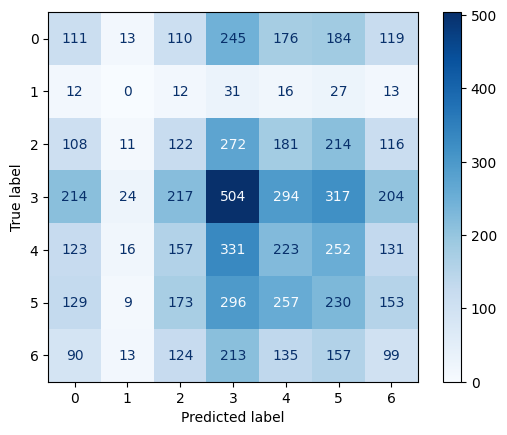

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.13      0.12      0.13      1024
           3       0.27      0.28      0.27      1774
           4       0.17      0.18      0.18      1233
           5       0.17      0.18      0.18      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.18      0.18      0.18      7178



In [8]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

